<a href="https://colab.research.google.com/github/plaban1981/ZINDI_HACKATHON/blob/master/Auto_NLP_Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Auto-ViML for Multi Class Text Classification

**Automatically Build Variant Interpretable ML models fast! Auto_ViML **

Advantages :-

* Requires no data prep - you can send in your entire dataframe without a single change. 

* Requires no classification of variables: All other packages want you to tell them which variables are numeric, categorical, NLP text, date variables etc. autoVimal detects all of these automatically as any AutoML package should!

*Does feature reduction automatically! All other packages use all the variables you send them which means they are either bloated or highly complex models. Autovimal is the only package that produces the best model with the fewest variables. That means it is very easy to interpret!

* Produces charts and graphs automatically.

* Handles both text, date and numeric and categorical data all in the same model. In other packages they cannot Handle NLP. Some Cannot handle date variables. But AutoViML is the only package that uses all of them

* It works on any Multi-Class, Multi-Label Data Set. So you can have many target labels. 


***Note :***

this is Meant to Be a Fast Algorithm, so use it for just quick POCs. This is Not Meant for Production Problems. It produces great models but it is not Perfect!

In [1]:
pip install autoviml

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 133kB 7.3MB/s 
     |████████████████████████████████| 64.8MB 55kB/s 


In [2]:
pip install catboost

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_train = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Zindi/Tech4MentalHealth/Test.csv')

In [6]:
df_train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


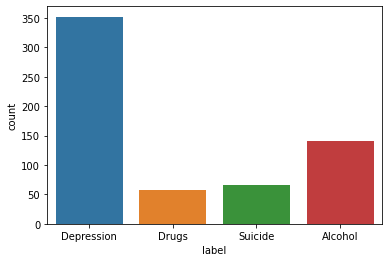

In [7]:
sns.countplot(df_train['label'])

In [9]:
df =  df_train[['text','label']].copy()

In [10]:
df.head()

,text,label
0,I feel that it was better I dieAm happy,Depression
1,Why do I get hallucinations?,Drugs
2,I am stresseed due to lack of financial suppor...,Depression
3,Why is life important?,Suicide
4,How could I be helped to go through the depres...,Depression


In [132]:
from autoviml.Auto_NLP import Auto_NLP
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.2,random_state=10)

In [133]:
print(X_train.shape)
print(X_test.shape)

(492, 2)
(124, 2)


Auto NLP processing on NLP Column: text
Shape of Train Data: 492 rows
    Shape of Test Data: 124 rows


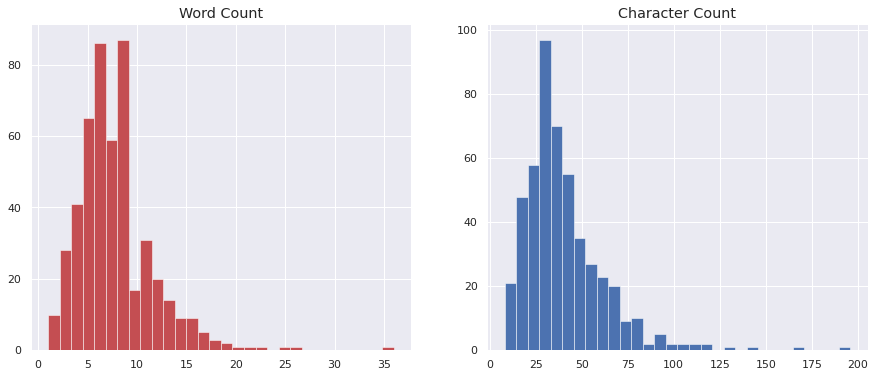

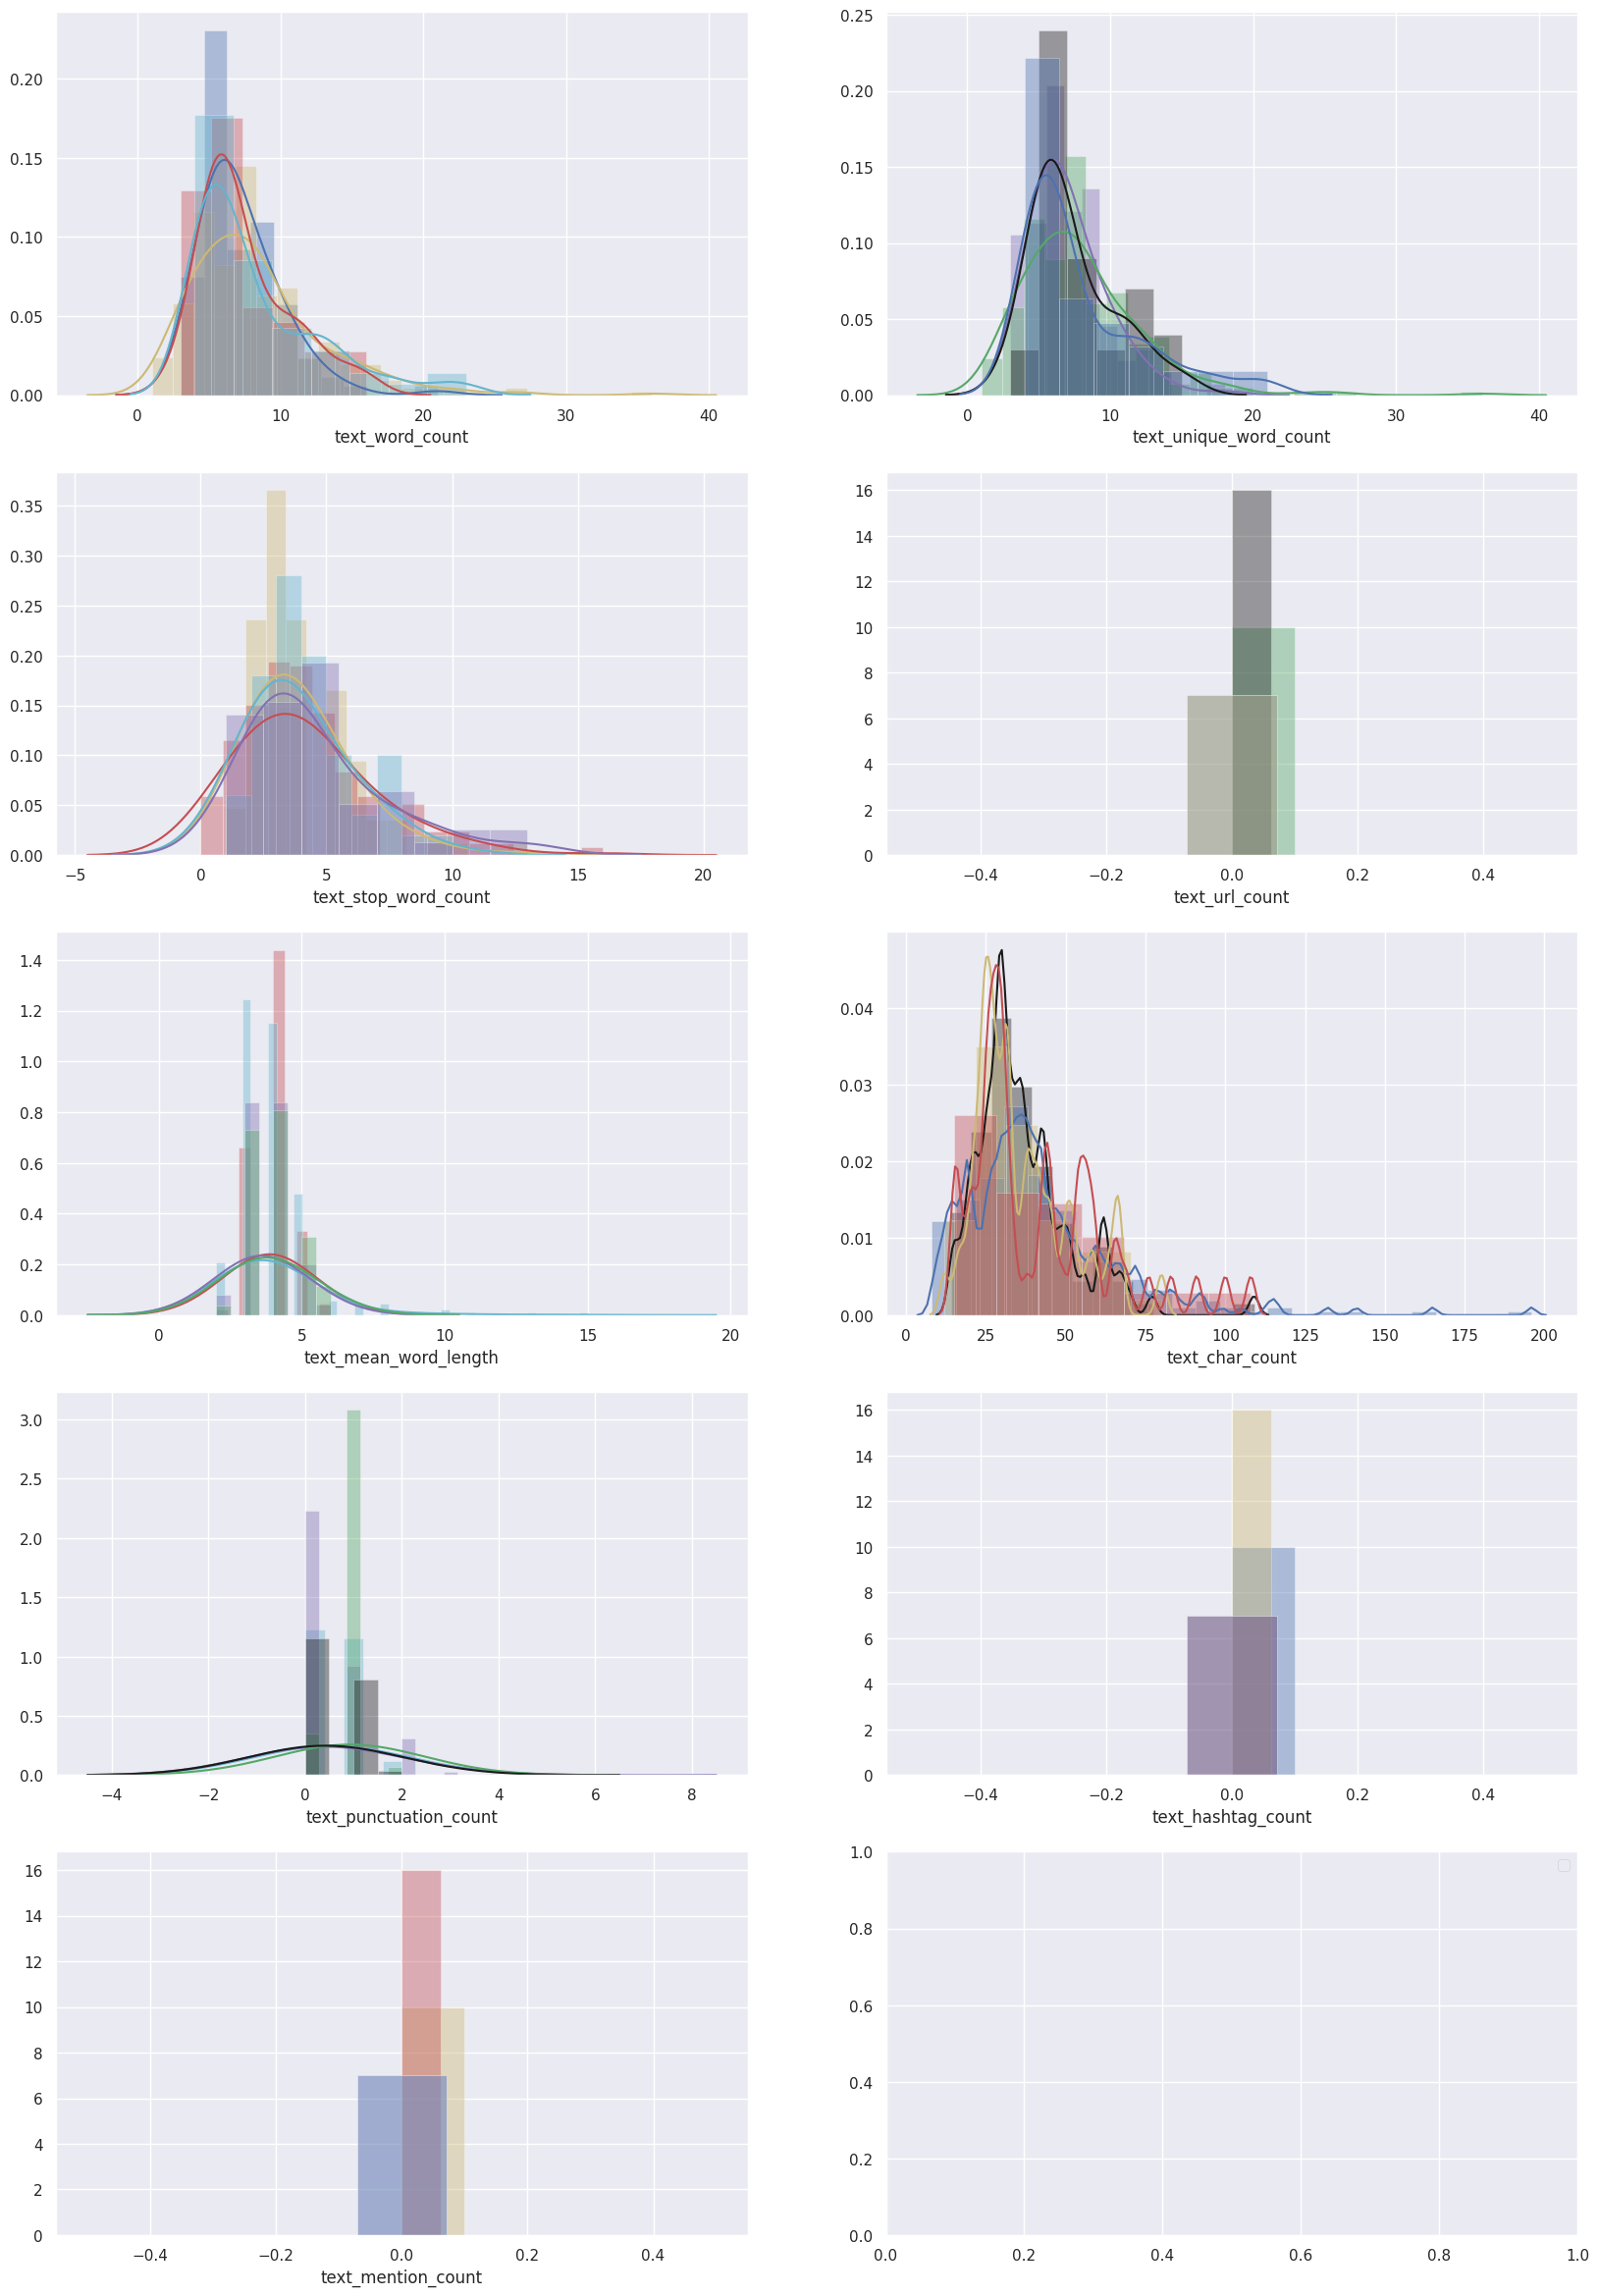

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in text before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 0 seconds
        Time Taken for Processing text in Train data = 1 seconds
            Time Taken for Stopword removal in Train data = 0 seconds
    Cleaning text in text before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 0 seconds
        Time Taken for Processing text in Test data = 0 seconds
            Time Taken for Stopword removal in Test data = 0 seconds
Train and Test data Text cleaning completed. Time taken = 0 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = text 
#################################################################################
Generating new features for 

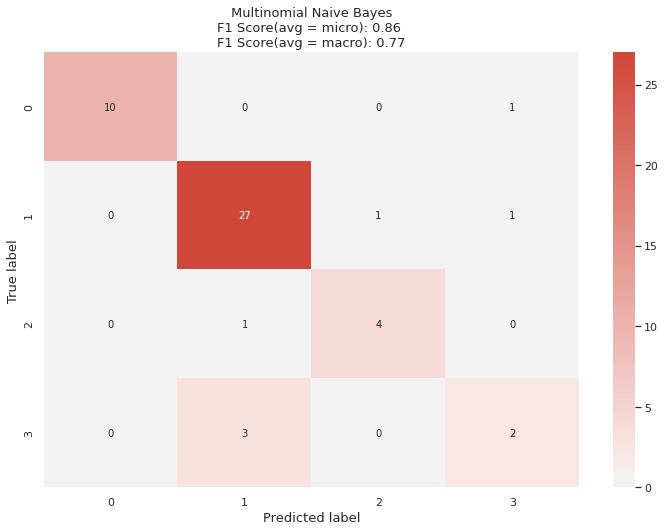

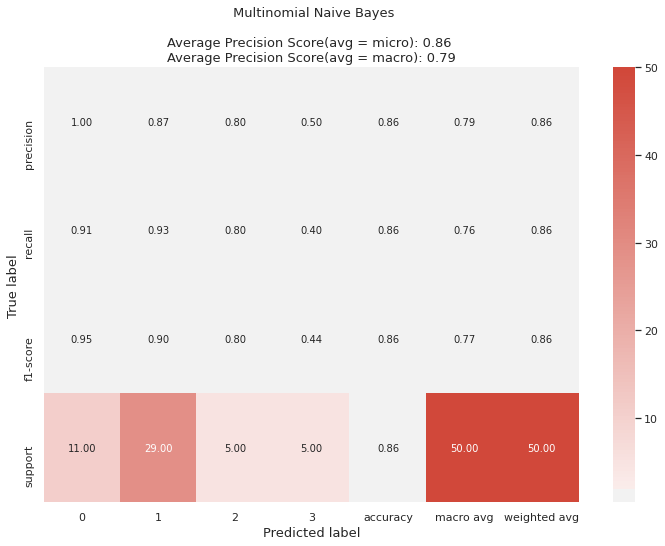

Training Pipeline on full Train data. This will take time...
Training completed. Time taken for Auto_NLP = 0.1 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [135]:
nlp_column ="text"
target ="label"
train_nlp,test_nlp,nlp_pipeline,predictions= Auto_NLP(nlp_column=nlp_column,
                                                      train=X_train,
                                                      test=X_test,
                                                      target = target,
                                                      score_type='f1_weighted',
                                                       modeltype='Classification',
                            top_num_features=200, verbose=3,
                            build_model=True)

In [136]:
nlp_pipeline

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>,
                                 encoding='latin-1', input='content',
                                 lowercase=True, max_df=0.25, max_features=328,
                                 min_df=2, ngram_range=(1, 5),
                                 preprocessor=None, stop_words=None,
                                 strip_accents='unicode',
                                 token_pattern='\\w{1,}', tokenizer=None,
                                 vocabulary=None)),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True, check_inverse=True,
                                     func=<function Auto_NLP.<locals>.<lambda> at 0x7f299d41cd08>,
                                     inv_kw_args=None, inverse_func=None,
    

In [61]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(df['label'])

In [62]:
df['label'] = labels

In [73]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('label',axis=1),df['label'],test_size=0.2,random_state=10,stratify=df['label'])

In [74]:
print(X_train.shape)
print(y_train.shape)

(492, 1)
(492,)


In [96]:
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = [word for word in set(stopwords.words('english'))]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]

In [108]:
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [124]:
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [129]:
classifier = Pipeline([
                          ('features', FeatureUnion([
                                                     
                            ('text',Pipeline([('colext', TextSelector('Text')),
                              ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                                                        min_df=.0025, max_df=0.25, ngram_range=(1,3)))
                              ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('TotalWords'))
        ]))])),
        ('svc', SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False))])

In [130]:
pipe.fit(X_train,y_train)

ValueError: ignored

In [34]:
y_pred = nlp_pipeline.predict(X_test)

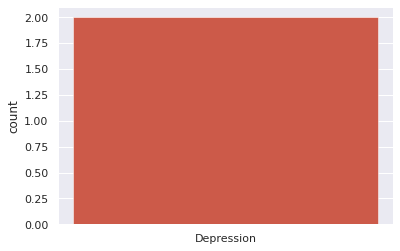

In [35]:
sns.countplot(y_pred)